In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
np.random.seed(5)

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


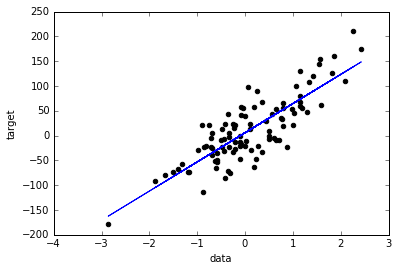

Coefficients: [ 58.80474649]
Intercept: 5.72845498016
Mean squared error: 1365.53
Variance score: 0.69


In [2]:
from sklearn import linear_model as lm

# generate training data from sin function
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=35)

# training linear regression 
regr = lm.LinearRegression()
regr.fit(X, y)

# draw result
plt.scatter(X, y,  color='black')
plt.plot(X, regr.predict(X), color='blue')
plt.xlabel('data')
plt.ylabel('target')
plt.show()

print('Coefficients: %s' % str(regr.coef_))
print('Intercept: %s'% str(regr.intercept_))
print("Mean squared error: %.2f" % np.mean((regr.predict(X) - y) ** 2))
print('Variance score: %.2f' % regr.score(X, y))

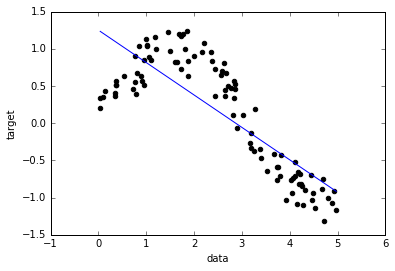

In [3]:
# generate training data from sin function
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()
y += np.random.randint(low=-100, high=100, size=100) / 300.0

# training linear regression 
regr = lm.LinearRegression()
regr.fit(X, y)

# draw result
plt.scatter(X, y,  color='black')
plt.plot(X, regr.predict(X), color='blue')
plt.xlabel('data')
plt.ylabel('target')
plt.show()

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model as lm
from sklearn.pipeline import Pipeline

# generate training data from sin function
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()
y += np.random.randint(low=-100, high=100, size=100) / 300.0

errs = np.zeros((5, 4))
for n_train_fold in xrange(1, 5):
    for n_degree in xrange(1, 6):
        # training linear regression with polynomial transform
        model = Pipeline([
            ('poly', PolynomialFeatures(degree=n_degree)),
            ('lm', lm.LinearRegression())
        ])
        model.fit(X[:25*n_train_fold + 25,], y[:25*n_train_fold + 25])
        errs[n_degree-1][n_train_fold-1] = np.mean((model.predict(X) - y) ** 2)
print errs

[[  2.09206311e+00   3.29430301e-01   2.42644162e-01   2.42644162e-01]
 [  1.48619942e+00   4.31288976e-01   1.13250315e-01   1.13250315e-01]
 [  7.41182807e-01   1.10593188e-01   3.72427203e-02   3.72427203e-02]
 [  6.55481514e+01   3.57074421e-02   3.11095862e-02   3.11095862e-02]
 [  4.70598817e+02   1.87264742e-01   3.10010224e-02   3.10010224e-02]]


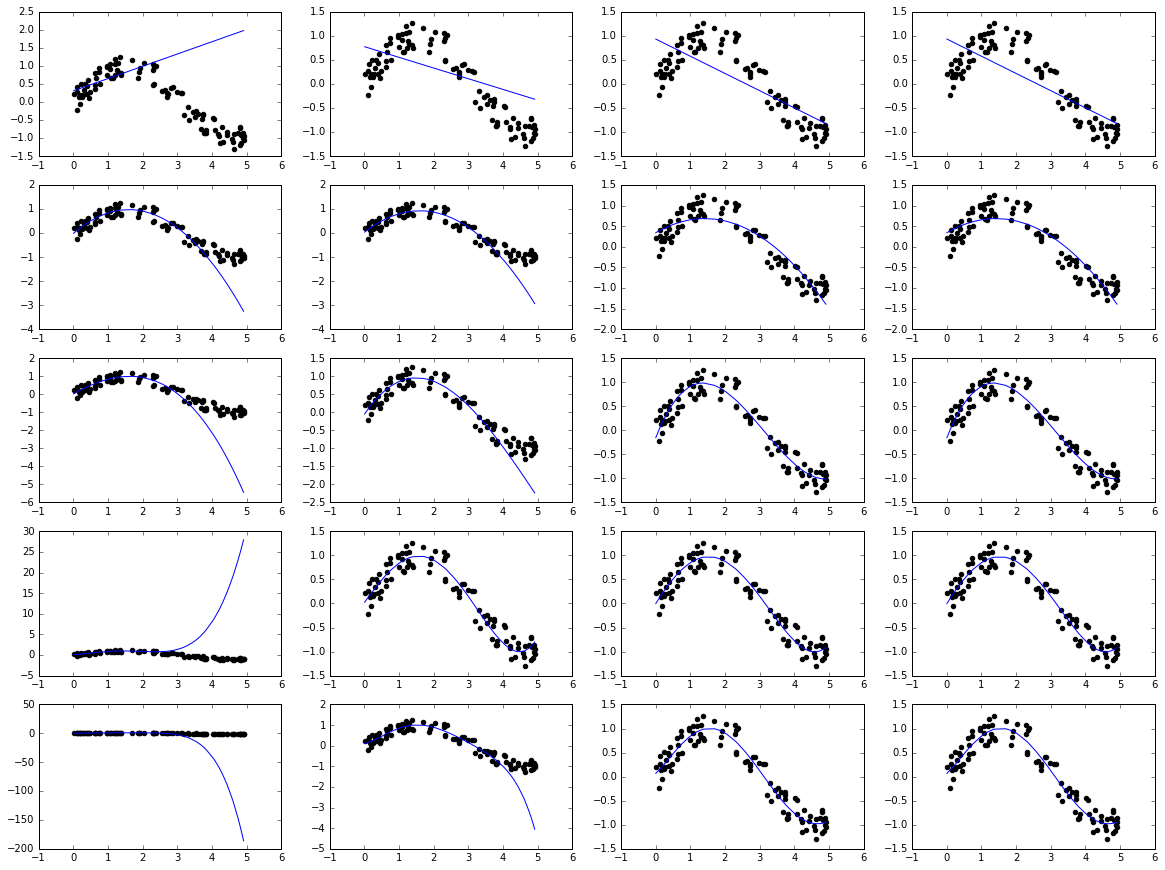

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model as lm
from sklearn.pipeline import Pipeline

# generate training data from sin function
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()
y += np.random.randint(low=-100, high=100, size=100) / 300.0

fig, axarr = plt.subplots(5, 4, figsize=(20, 15))
for n_train_fold in xrange(1, 5):
    for n_degree in xrange(1, 6):
        # training linear regression with polynomial transform
        model = Pipeline([
            ('poly', PolynomialFeatures(degree=n_degree)),
            ('lm', lm.LinearRegression())
        ])
        model.fit(X[:25*n_train_fold + 25,], y[:25*n_train_fold + 25])
        # draw result
        axarr[n_degree-1][n_train_fold-1].scatter(X, y,  color='black')
        axarr[n_degree-1][n_train_fold-1].plot(X, model.predict(X), color='blue')
plt.show()

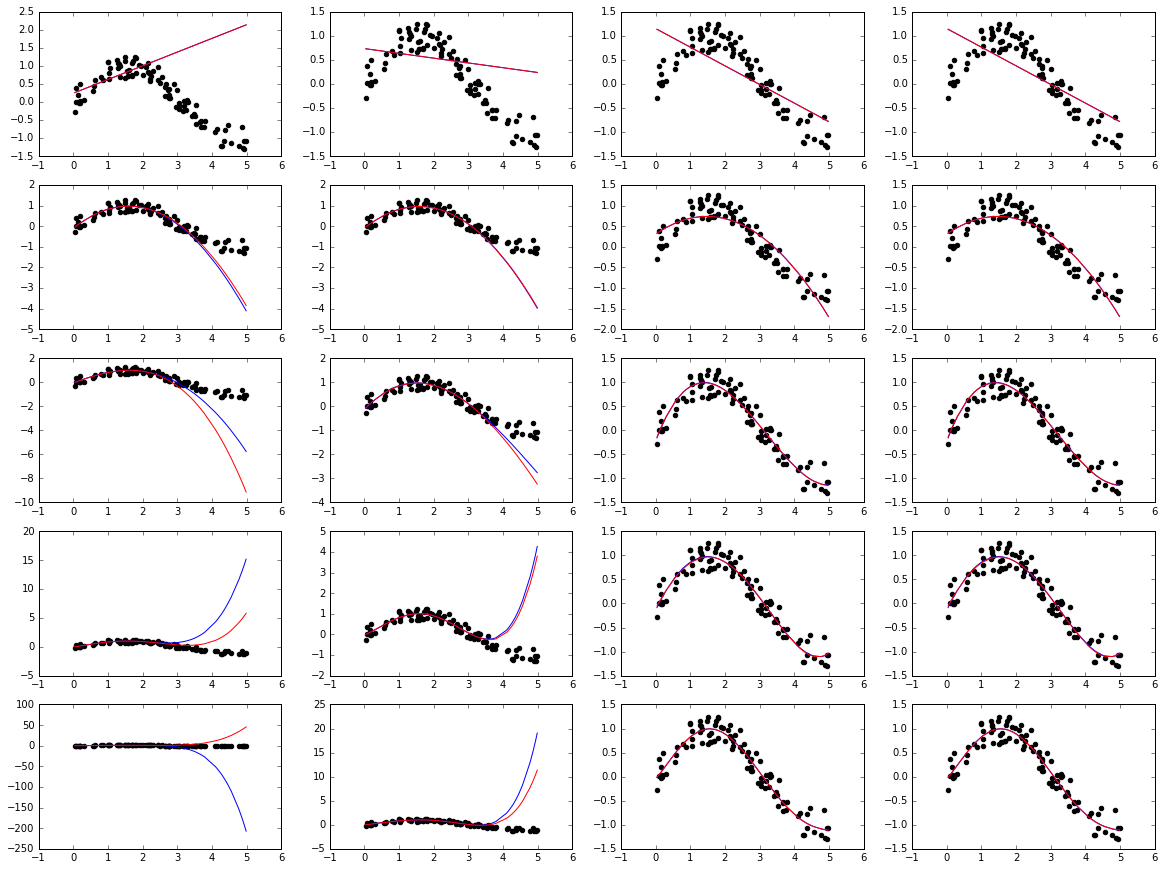

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model as lm
from sklearn.pipeline import Pipeline

# generate training data from sin function
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()
y += np.random.randint(low=-100, high=100, size=100) / 300.0

fig, axarr = plt.subplots(5, 4, figsize=(20, 15))
for n_train_fold in xrange(1, 5):
    for n_degree in xrange(1, 6):
        # training linear regression with polynomial transform
        model = Pipeline([
            ('poly', PolynomialFeatures(degree=n_degree)),
            ('lm', lm.LinearRegression())
        ])
        model.fit(X[:25*n_train_fold + 25,], y[:25*n_train_fold + 25])
        # training ridge regression with polynomial transform
        model2 = Pipeline([
            ('poly', PolynomialFeatures(degree=n_degree)),
            ('lm', lm.Ridge(alpha=0.05))
        ])
        model2.fit(X[:25*n_train_fold + 25,], y[:25*n_train_fold + 25])
        # draw result
        axarr[n_degree-1][n_train_fold-1].scatter(X, y,  color='black')
        axarr[n_degree-1][n_train_fold-1].plot(X, model.predict(X), color='blue')
        axarr[n_degree-1][n_train_fold-1].plot(X, model2.predict(X), color='red')
plt.show()

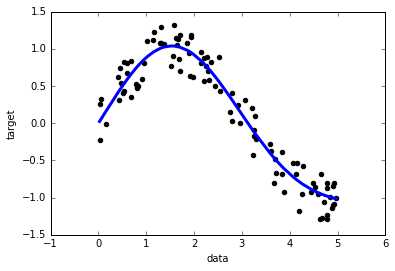

Mean squared error: 0.04
Variance score: 0.94


In [5]:
from sklearn.svm import SVR

regr = SVR(kernel='rbf', C=1e2, gamma=0.1)
regr.fit(X, y)

plt.scatter(X, y,  color='black')
plt.plot(
    X, 
    regr.predict(X), 
    color='blue',
    linewidth=3
)
plt.xlabel('data')
plt.ylabel('target')
plt.show()

print("Mean squared error: %.2f" % np.mean((regr.predict(X) - y) ** 2))
print('Variance score: %.2f' % regr.score(X, y))